In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
#from sklearn.cross_validation import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB 
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

## Importing data

In [2]:
df = pd.read_csv(r'C:\dataset\adult.csv',sep=',')

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32561, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Missing values

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [11]:
cat_attributes = df.select_dtypes(include=['object'])
num_attributes = df.select_dtypes(include=['int'])

cat_vars=['workclass','education','marital.status','occupation','relationship','race', 'sex', 'native.country']

continuous_vars=['age','fnlwgt'    ,'education.num'   ,'capital.gain'  ,'capital.loss'  ,'hours.per.week']  

In [12]:
for cn in cat_vars:
    print(cn,"->",df[cn].unique())

workclass -> ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education -> ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status -> ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation -> ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship -> ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race -> ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex -> ['Female' 'Male']
native.country -> ['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippi

Impute values in category columns

FIlling missing values for workclass ,occupation  and native.country

In [13]:
df['workclass'].replace('?', df['workclass'].mode()[0],inplace=True)
df['occupation'].replace('?', df['occupation'].mode()[0],inplace=True)
df['native.country'].replace('?', df['native.country'].mode()[0],inplace=True)
for cn in cat_vars:
    print(cn,"->",df[cn].unique())

workclass -> ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
education -> ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
marital.status -> ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation -> ['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']
relationship -> ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
race -> ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
sex -> ['Female' 'Male']
native.country -> ['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinad

[]

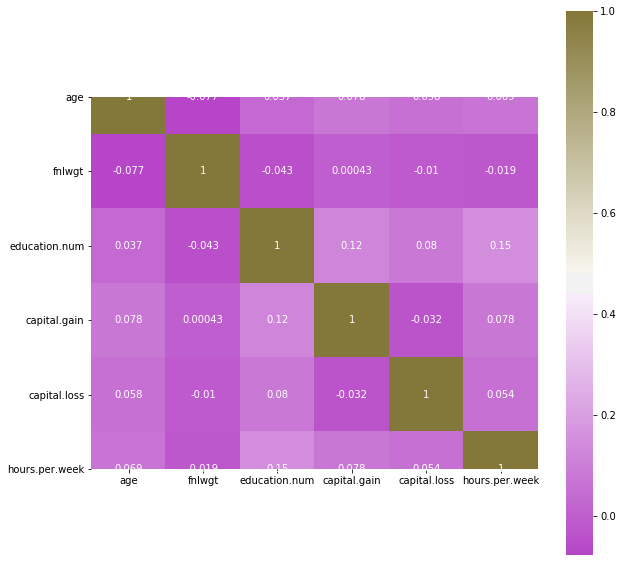

In [14]:
##Correlation analysis for continuous variables
#Correlation plot
df_corr = df.loc[:,continuous_vars]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(300, 75, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [15]:
#Dropping redundent column education
df = df.drop('education', axis = 1)
cat_vars=['workclass','marital.status','occupation','relationship','race', 'sex', 'native.country']

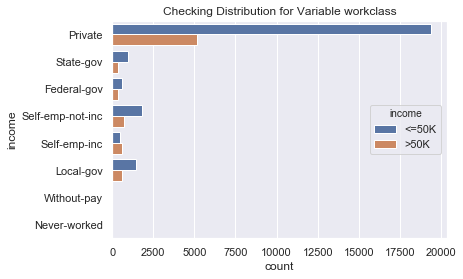

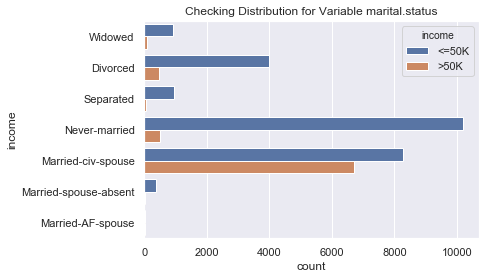

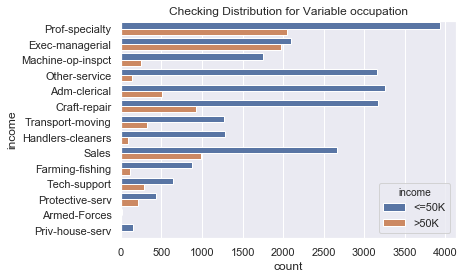

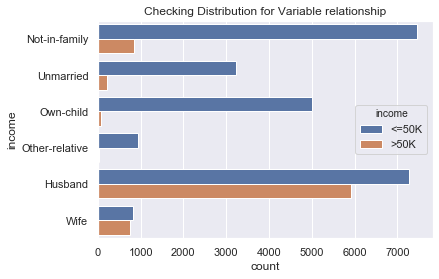

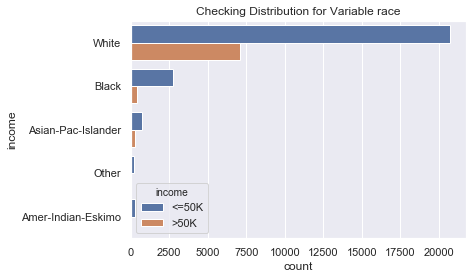

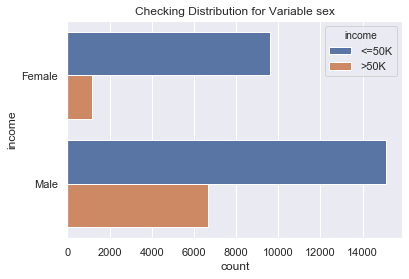

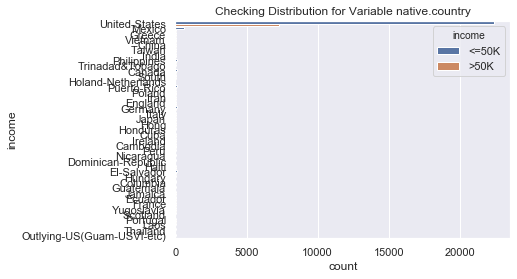

In [16]:
sns.set(style="darkgrid")
cat_attributes = df.select_dtypes(include=['object'])
for cat in cat_vars:
    sns.countplot(y=cat, hue='income', data = cat_attributes)
    plt.title("Checking Distribution for Variable "+cat)
    plt.ylabel("income")
    plt.show()

## Preprocessing

In [17]:
cleanup_nums = {
    "workclass": {'Private':1, 'State-gov':2, 'Federal-gov':3, 'Self-emp-not-inc':4, 'Self-emp-inc':5,
 'Local-gov':6, 'Without-pay':7, 'Never-worked':8},
    "marital.status": {'Widowed':1, 'Divorced':2, 'Separated':3, 'Never-married':4, 'Married-civ-spouse':5,
 'Married-spouse-absent':6, 'Married-AF-spouse':7},
    "occupation": {'Prof-specialty':1, 'Exec-managerial':2, 'Machine-op-inspct':3, 'Other-service':4,
 'Adm-clerical':5, 'Craft-repair':6, 'Transport-moving':7, 'Handlers-cleaners':8,
 'Sales':9, 'Farming-fishing':10, 'Tech-support':11, 'Protective-serv':12, 'Armed-Forces':13,
 'Priv-house-serv':14},
    "relationship": {'Not-in-family':1, 'Unmarried':2, 'Own-child':3, 'Other-relative':4, 'Husband':5, 'Wife':6},
    "race": {'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Other':4, 'Amer-Indian-Eskimo':5},
    "sex": {'Female':1, 'Male':2},
    "native.country": {'United-States':1, 'Mexico':2, 'Greece':3, 'Vietnam':4, 'China':5, 'Taiwan':6, 'India':7,
 'Philippines':7, 'Trinadad&Tobago':8, 'Canada':9, 'South':10, 'Holand-Netherlands':11,
 'Puerto-Rico':33, 'Poland':34, 'Iran':35, 'England':36, 'Germany':37, 'Italy':38, 'Japan':39,'Hong':40,
 'Honduras':12, 'Cuba':13, 'Ireland':14, 'Cambodia':15, 'Peru':16, 'Nicaragua':17,
 'Dominican-Republic':18, 'Haiti':19, 'El-Salvador':20, 'Hungary':21, 'Columbia':22,
 'Guatemala':23, 'Jamaica':24, 'Ecuador':25, 'France':26, 'Yugoslavia':27, 'Scotland':28,
 'Portugal':29, 'Laos':30, 'Thailand':31, 'Outlying-US(Guam-USVI-etc)':32},
}
desicion_col=df['income']
df.replace(cleanup_nums, inplace=True)
df["native.country"] = df["native.country"].astype('int64')
df["age"] = df["age"].astype('int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education.num     32561 non-null int64
marital.status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
sex               32561 non-null int64
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null int64
income            32561 non-null object
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


[]

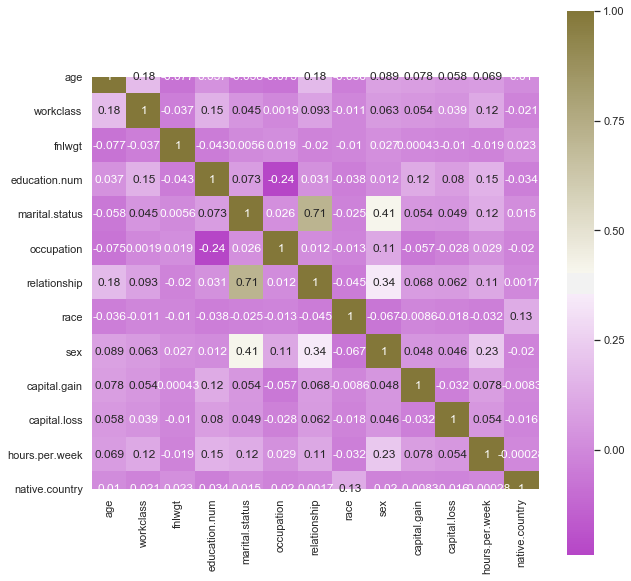

In [18]:
##Correlation analysis for continuous variables
#Correlation plot
df_corr = df.loc[:]
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(300, 75, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

## Transposition

In [19]:
X= df.loc[:, df.columns != 'income']
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [20]:
Y= df.loc[:, df.columns == 'income']
Y.columns
Y.describe()

,income
count,32561
unique,2
top,<=50K
freq,24720


## Splitting data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 0) 

## GaussianNB

In [22]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_GaussianNB = clf.predict(X_test)
accuracy_score(y_test, y_pred_GaussianNB, normalize = True)




C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7960938459648692

In [23]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_GaussianNB)
cm

array([[5890,  303],
       [1357,  591]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_GaussianNB))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      6193
        >50K       0.66      0.30      0.42      1948

    accuracy                           0.80      8141
   macro avg       0.74      0.63      0.65      8141
weighted avg       0.78      0.80      0.77      8141



## BernoulliNB 

In [25]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred_BernoulliNB = clf.predict(X_test)
accuracy_score(y_test, y_pred_BernoulliNB, normalize = True)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7824591573516767

In [26]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_BernoulliNB)
cm

array([[5952,  241],
       [1530,  418]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_BernoulliNB))

              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      6193
        >50K       0.63      0.21      0.32      1948

    accuracy                           0.78      8141
   macro avg       0.71      0.59      0.60      8141
weighted avg       0.76      0.78      0.74      8141



## MultinomialNB

In [28]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_MultinomialNB = clf.predict(X_test)
accuracy_score(y_test, y_pred_MultinomialNB, normalize = True)
 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7855300331654588

In [29]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_MultinomialNB)
cm

array([[5926,  267],
       [1479,  469]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_MultinomialNB))

              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87      6193
        >50K       0.64      0.24      0.35      1948

    accuracy                           0.79      8141
   macro avg       0.72      0.60      0.61      8141
weighted avg       0.76      0.79      0.75      8141



In [31]:



#Save in CSV
dict2={"Actual":y_test["income"].values.ravel().tolist(),"Predicted":y_pred_BernoulliNB}

df2 = pd.DataFrame(dict2) 

df2.to_csv('BernoulliNB.csv',index=False) 



dict3={"Actual":y_test["income"].values.ravel().tolist(),"Predicted":y_pred_MultinomialNB}

df3 = pd.DataFrame(dict3) 


df3.to_csv('MultinomialNB.csv',index=False) 



gaussianDict={"Actual":y_test["income"].values.ravel().tolist(),"Predicted":y_pred_GaussianNB}

df1 = pd.DataFrame(gaussianDict) 

df1.to_csv('GaussianNB.csv',index=False) 